<a href="https://colab.research.google.com/github/aida-suryadi/CNN_DL---Image-Classification-/blob/main/Classification_door_and_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/MyDrive/indoor test')

Mounted at /content/gdrive


In [72]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same', input_shape=(200, 200, 3)))

model.add(MaxPooling2D((2, 2)))

# Reshape the deep features to fit MLP as its input
model.add(Flatten())

# Full-connected layers 
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Step for model compilation
opt = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               40960128  
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
# Initialize image data generarator
# To simplfiy process for reading data
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory('/content/gdrive/MyDrive/indoor test/train',
    class_mode='binary', batch_size=10, target_size=(200, 200) , classes=[ 'door','human'] )
val_it = datagen.flow_from_directory('/content/gdrive/MyDrive/indoor test/val',
    class_mode='binary', batch_size=10, target_size=(200, 200), classes=[ 'door', 'human'])


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [74]:
print(train_it.class_indices)

{'door': 0, 'human': 1}


In [78]:
#training the model and log the history
history = model.fit(train_it, steps_per_epoch=len(train_it),
    validation_data=val_it, validation_steps=len(val_it), epochs=30, verbose=1)
# Validation of the model
loss, acc = model.evaluate(val_it, steps=len(val_it), verbose=1)
print('> %.2f' % (acc * 100.0))

Epoch 1/30
16/16 [==============================] - 9s 544ms/step - loss: 0.2827 - accuracy: 0.9000 - val_loss: 0.3667 - val_accuracy: 0.8000
Epoch 2/30
16/16 [==============================] - 8s 522ms/step - loss: 0.2675 - accuracy: 0.9187 - val_loss: 0.3175 - val_accuracy: 0.8000
Epoch 3/30
16/16 [==============================] - 9s 532ms/step - loss: 0.2618 - accuracy: 0.9187 - val_loss: 0.3451 - val_accuracy: 0.8000
Epoch 4/30
16/16 [==============================] - 9s 535ms/step - loss: 0.2379 - accuracy: 0.9375 - val_loss: 0.3217 - val_accuracy: 0.8000
Epoch 5/30
16/16 [==============================] - 8s 528ms/step - loss: 0.2326 - accuracy: 0.9375 - val_loss: 0.3035 - val_accuracy: 0.8000
Epoch 6/30
16/16 [==============================] - 9s 530ms/step - loss: 0.2281 - accuracy: 0.9250 - val_loss: 0.2457 - val_accuracy: 0.9250
Epoch 7/30
16/16 [==============================] - 9s 533ms/step - loss: 0.2438 - accuracy: 0.9000 - val_loss: 0.2437 - val_accuracy: 0.9250
Epoch 

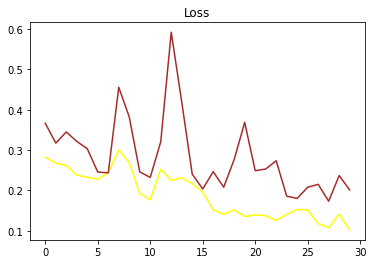

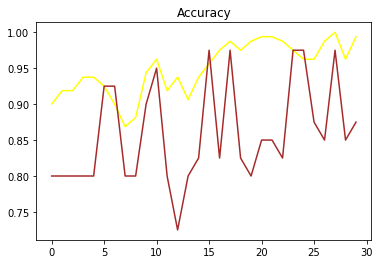

In [79]:
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='yellow', label='train')
pyplot.plot(history.history['val_loss'], color='brown', label='val')

pyplot.show()
# # Graph - the accuracy value
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], color='yellow', label='train')
pyplot.plot(history.history['val_accuracy'], color='brown', label='val')

# show the graphs
pyplot.show()
pyplot.close()

In [80]:
#test and predict
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

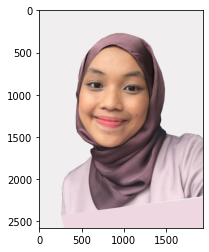

In [81]:
import matplotlib.pyplot as plt
new_image = plt.imread('photo profil.jpg')
img = plt.imshow(new_image)

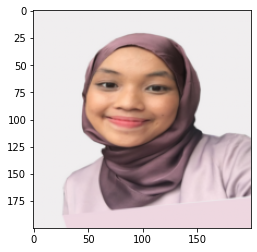

In [82]:
from skimage.transform import resize
resized_image = resize(new_image, (200, 200, 3))
img = plt.imshow(resized_image)

In [83]:
import numpy as np

# Get the models predictions
predictions = model.predict(np.array([resized_image]))
print(predictions)

[[0.86576366]]


In [51]:
from google.colab import files
uploaded = files.upload()

Saving hinged-Doors.jpg to hinged-Doors (1).jpg


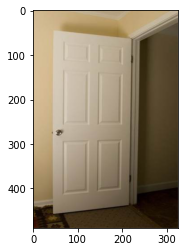

In [56]:

new_image_01 = plt.imread('hinged-Doors.jpg')
img_01 = plt.imshow(new_image_01)

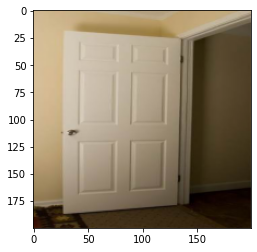

In [55]:

resized_image_01 = resize(new_image_01, (200, 200, 3))
img = plt.imshow(resized_image_01)

In [57]:
# Get the models predictions
predictions_01 = model.predict(np.array([resized_image_01]))
print(predictions_01)

[[0.10490537]]
